In [17]:
import pandas as pd
from nasspython import nass_api as na
# pip install nasspython: https://pypi.org/project/nasspython/
from statsmodels.tsa.arima_model import ARIMA
from pathlib import Path
import datetime as dt

In [63]:
USDA_API_KEY = 'C6C2F629-A5BF-3F27-916A-4F15189AD588'

#na.nass_count(USDA_API_KEY, state_name = "NORTH CAROLINA", county_name = "WAKE")
#na.nass_param(USDA_API_KEY, param = "short_desc")
#na.nass_data(USDA_API_KEY, year = 2012, agg_level_desc = "COUNTY",short_desc = "AG LAND, INCL BUILDINGS - ASSET VALUE, MEASURED IN $")

# function inputs
# NY/NJ/PA
state_list = ['NEW YORK','NEW JERSEY','PENNSYLVANIA']
start_yr = 2000
end_yr = 2020

In [103]:
# create list for years
year_list = [start_yr]
year = start_yr
while year < end_yr:
    year += 1
    year_list.append(int(year))
year_list

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [104]:
vpa_list = []
year_list_new = []
state_list_new = []
for yr in year_list:
    # total acres: 'AG LAND, CROPLAND, HARVESTED - ACRES'
    # value per acre: 'AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $ / ACRE'
    data = na.nass_data(USDA_API_KEY, year = yr, 
                        agg_level_desc = "STATE", 
                        short_desc = "AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $ / ACRE"
                       )
    df = pd.DataFrame(data['data']).set_index("state_name")
    
    for state in state_list:
        vpa = df.loc[state,'Value']
    
        vpaint = ''
        for char in vpa:
            if char.isdigit() == True:
                vpaint = vpaint + char
        
        vpa_list.append(int(vpaint))
        year_list_new.append(yr)
        state_list_new.append(state)
        
#df = pd.DataFrame({'Year':year_list,'$/acre':vpa_list}).set_index('Year')
#df
vpa_list

[1180,
 8400,
 3000,
 1250,
 8700,
 3180,
 1320,
 9000,
 3350,
 1390,
 9300,
 3500,
 1460,
 11300,
 3600,
 1520,
 13000,
 4030,
 1800,
 14900,
 4680,
 1900,
 16000,
 5330,
 2150,
 15600,
 6000,
 2200,
 14000,
 5720,
 2400,
 13300,
 5710,
 2400,
 12900,
 5630,
 2600,
 12400,
 5760,
 2550,
 12900,
 5840,
 2570,
 13200,
 5950,
 2680,
 13800,
 6130,
 2690,
 13500,
 6450,
 2740,
 13600,
 6470,
 2800,
 13700,
 6890,
 2810,
 13700,
 7030,
 2800,
 13800,
 7100]

In [66]:
dict = {'Year': year_list_new, 'State': state_list_new, 'ValuePerAcre': vpa_list}
land_df = pd.DataFrame(dict)
pa_vpa = land_df[land_df['State'] == 'PENNSYLVANIA']['ValuePerAcre'].tolist()
ny_vpa = land_df[land_df['State'] == 'NEW YORK']['ValuePerAcre'].tolist()
nj_vpa = land_df[land_df['State'] == 'NEW JERSEY']['ValuePerAcre'].tolist()

dict = {'Year': year_list, 'PAValuePerAcre': pa_vpa, 'NYValuePerAcre': ny_vpa, 'NJValuePerAcre': nj_vpa}
st_land_df = pd.DataFrame(dict)
#land_df.set_index('Year',inplace = True)
#land_df.groupby('Year').mean()
st_land_df

,Year,PAValuePerAcre,NYValuePerAcre,NJValuePerAcre
0,2000,3000,1180,8400
1,2001,3180,1250,8700
2,2002,3350,1320,9000
3,2003,3500,1390,9300
4,2004,3600,1460,11300
5,2005,4030,1520,13000
6,2006,4680,1800,14900
7,2007,5330,1900,16000
8,2008,6000,2150,15600
9,2009,5720,2200,14000


<AxesSubplot:xlabel='Year'>

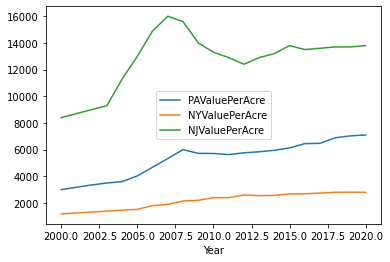

In [68]:
st_land_df = st_land_df.set_index('Year')
st_land_df.plot()

In [102]:
### code was used to check the ARIMA model ###
#model = ARIMA(st_land_df['PAValuePerAcre'], order=(0, 1, 1))
#results = model.fit()
#results.summary()

#predict_df = pd.DataFrame(results.forecast(steps=2)[0])
#predict_df.iloc[1,0]

In [101]:
predictions = {}
for col in st_land_df.columns:
    model = ARIMA(st_land_df[col], order=(0, 1, 1))
    results = model.fit()
    predict_df = pd.DataFrame(results.forecast(steps=2)[0])
    predictions[col] = predict_df.iloc[1,0]
predictions

C:\Users\adomenick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\adomenick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when

{'PAValuePerAcre': 7481.35867200686,
 'NYValuePerAcre': 2971.5522905496096,
 'NJValuePerAcre': 14262.831866186005}